# MOVIE RATING PREDICTION WITH PYTHON

## Importing Libraries

In [1]:
import pandas as pd 
import chardet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 

In [2]:
with open('car_purchasing.csv', 'rb') as file:
    result = chardet.detect(file.read())

detected_encoding = result['encoding']
confidence = result['confidence']

print(f"Detected encoding: {detected_encoding} (confidence: {confidence})")

Detected encoding: ISO-8859-1 (confidence: 0.73)


In [3]:
df = pd.read_csv('IMDb Movies India.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Preprocessing

In [5]:
df.drop(['Name', 'Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 1, inplace = True)

In [6]:
df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

In [7]:
df.head()

,Duration,Genre,Rating,Votes
0,NaN,Drama,NaN,NaN
1,109 min,Drama,7.0,8
2,90 min,Drama,NaN,NaN
2,90 min,Musical,NaN,NaN
3,110 min,Comedy,4.4,35


In [8]:
df.dtypes

Duration     object
Genre        object
Rating      float64
Votes        object
dtype: object

In [9]:
df['Rating'].isnull().sum()

9113

In [10]:
df.dropna(subset = ['Rating'], inplace = True)

In [11]:
df.head()

,Duration,Genre,Rating,Votes
1,109 min,Drama,7.0,8
3,110 min,Comedy,4.4,35
3,110 min,Romance,4.4,35
5,147 min,Comedy,4.7,827
5,147 min,Drama,4.7,827


### Removing Null values in the dataset

In [12]:
df.isnull().sum()

Duration    3587
Genre        102
Rating         0
Votes          0
dtype: int64

In [13]:
df.shape

(15837, 4)

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Duration    0
Genre       0
Rating      0
Votes       0
dtype: int64

In [16]:
df.shape

(12219, 4)

In [17]:
df.dtypes

Duration     object
Genre        object
Rating      float64
Votes        object
dtype: object

In [18]:
l = []
for i in df['Votes']:
    l.append(int(i.replace(",", "")))
df['Votes'] = l

In [19]:
df.dtypes

Duration     object
Genre        object
Rating      float64
Votes         int64
dtype: object

In [20]:
l = []
for i in df['Duration']:
    l.append(int(i[0:-4]))
df['Duration'] = l

In [21]:
df.dtypes

Duration      int64
Genre        object
Rating      float64
Votes         int64
dtype: object

In [22]:
len(df['Genre'].unique())

22

## Data Visualization

In [23]:
dictionary = {'Genre': [], 'Rating': [], 'Votes': []}
for i in df['Genre'].unique():
    Genres = df[df['Genre'] == i]
    mean_rating = Genres['Rating'].mean()
    mean_votes = Genres['Votes'].mean()
    dictionary['Genre'].append(i)
    dictionary['Rating'].append(mean_rating)
    dictionary['Votes'].append(mean_votes)
ds = pd.DataFrame(dictionary)


In [24]:
top_ratings = pd.DataFrame(ds.sort_values(by='Rating', ascending = False)).head(10)

In [25]:
top_ratings

,Genre,Rating,Votes
17,Documentary,7.586154,200.807692
20,News,7.250000,36.000000
10,History,6.945631,5705.961165
14,Biography,6.840476,9229.547619
13,Sport,6.634091,11054.318182
15,Family,6.353972,1519.556075
3,Musical,6.250721,3213.189904
18,Music,6.129091,6721.127273
0,Drama,6.067403,3072.211853
4,War,6.041176,3219.588235


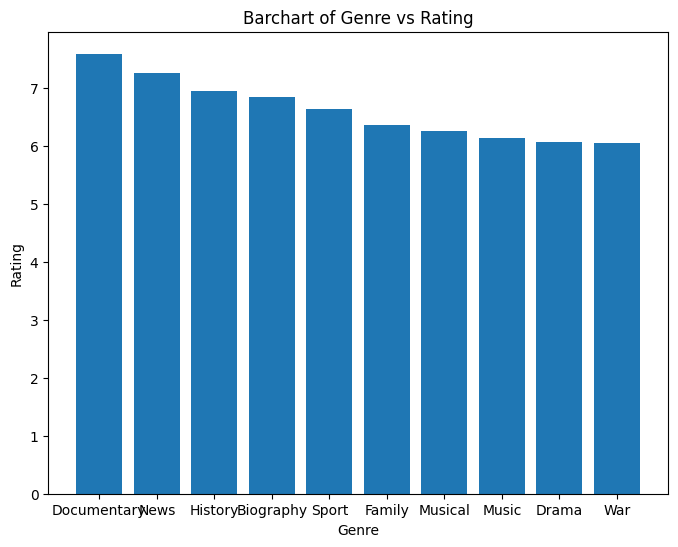

In [26]:
plt.figure(figsize = (8,6))
plt.bar(top_ratings['Genre'], top_ratings['Rating'])
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Barchart of Genre vs Rating")
plt.show()

In [27]:
top_votes = pd.DataFrame(ds.sort_values(by = 'Votes', ascending = False)).head(10)

In [28]:
top_votes

,Genre,Rating,Votes
13,Sport,6.634091,11054.318182
14,Biography,6.840476,9229.547619
18,Music,6.129091,6721.127273
16,Fantasy,5.820946,6172.108108
10,History,6.945631,5705.961165
11,Adventure,5.892254,5664.327465
1,Comedy,5.757470,4481.762574
9,Crime,5.826196,3805.830296
12,Sci-Fi,5.257143,3644.628571
4,War,6.041176,3219.588235


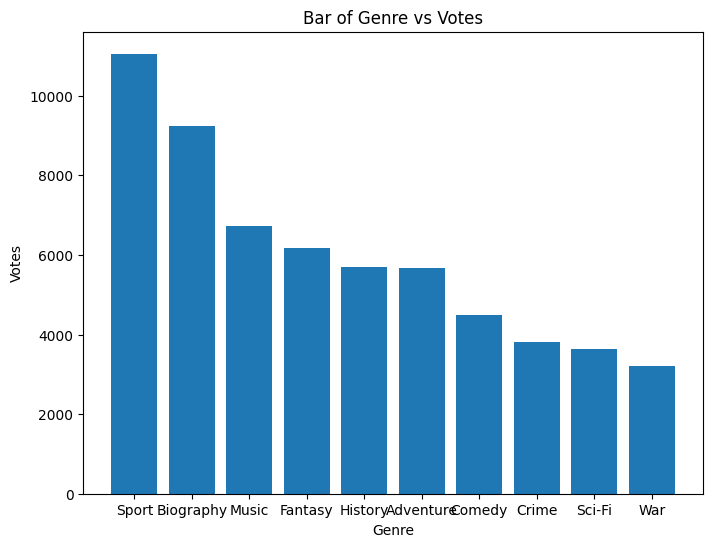

In [29]:
plt.figure(figsize = (8,6))
plt.bar(top_votes['Genre'], top_votes['Votes'])
plt.xlabel("Genre")
plt.ylabel("Votes")
plt.title("Bar of Genre vs Votes")
plt.show()

## Label Encoder

In [30]:
label_encoder = LabelEncoder()

In [31]:
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Duration,Genre,Rating,Votes
1,109,7,7.0,8
3,110,4,4.4,35
3,110,16,4.4,35
5,147,4,4.7,827
5,147,7,4.7,827


## Train Test Split

In [32]:
x_data = df.drop(['Rating'], axis = 1)

In [33]:
y_data = df['Rating']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

## Model Building

In [35]:
rf = RandomForestRegressor()
rf = rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

In [36]:
print("Mean squared error is", mean_squared_error(y_test, y_predict))
print("Root mean squared error is", np.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absolute error is", mean_absolute_error(y_test, y_predict))
print("R2_score is", r2_score(y_test, y_predict))

Mean squared error is 1.6608033721890858
Root mean squared error is 1.2887216038342362
Mean absolute error is 1.0049774315935323
R2_score is 0.14075333262947154


## Predicting on Unseen Data

In [37]:
rf.predict([[109, 0, 8]])

c:\Users\sahuk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.64228571])